# Gerber PCA

diego.alvarez@colorado.edu <br> Diego Alvarez

# Packages

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import pandas_datareader as web
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Acessing Gerber Object

In [2]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "src"))
from Gerber import Gerber

# Collect Data

In [3]:
tsy_tickers = ["DGS1", "DGS2", "DGS3", "DGS5", "DGS7", "DGS10"]
start_date = dt.date(year = 1900, month = 1, day = 1)
end_date = dt.date.today()
df = web.DataReader(name = tsy_tickers, data_source = "fred", start = start_date, end = end_date).dropna()

# Calculate Original PCA

In [4]:
pca_model = PCA(n_components = 3).fit(StandardScaler().fit_transform(df))
exp_var = pca_model.explained_variance_ratio_

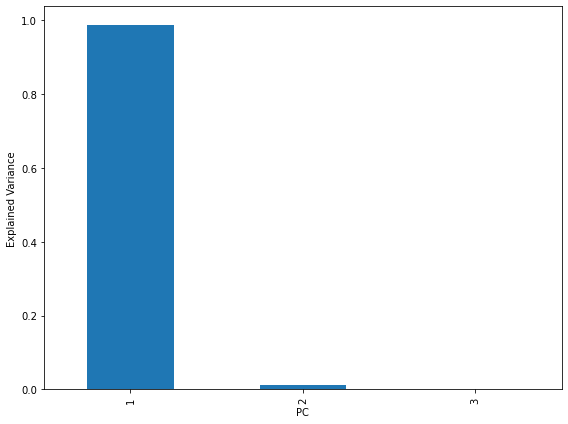

In [5]:
(pd.DataFrame(
    {"Explained Variance": exp_var}).
    reset_index().
    assign(index = lambda x: x.index + 1).
    set_index("index").
    plot(
        figsize = (8,6),
        kind = "bar",
        legend = False,
        xlabel = "PC",
        ylabel = "Explained Variance"))

plt.tight_layout()
plt.show()

In [6]:
df_pcs = (pd.DataFrame(
    data = pca_model.fit_transform(df),
    columns = ["PC{}".format(i+1) for i in range(3)]).
    assign(date = df.index.to_list()).
    set_index("date"))

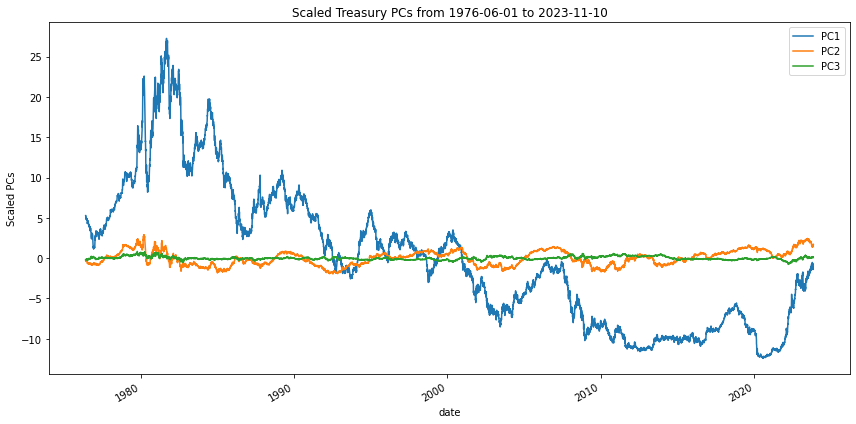

In [7]:
(df_pcs.plot(
    figsize = (12,6),
    ylabel = "Scaled PCs",
    title = "Scaled Treasury PCs from {} to {}".format(
        df_pcs.index.min().date(),
        df_pcs.index.max().date())))

plt.tight_layout()
plt.show()

# Calculate Gerber PCA

In [8]:
eigenvalues, eigenvectors, explained_variance, reduced_data = Gerber().PCA(df = df, n_components = 3)

C:\Users\Diego\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Diego\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Diego\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


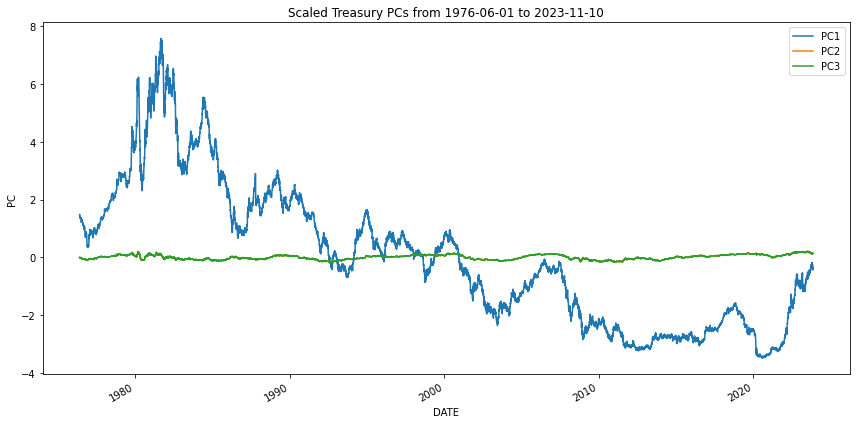

In [9]:
reduced_data.plot(
    figsize = (12,6),
    ylabel = "PC",
    title = "Scaled Treasury PCs from {} to {}".format(
        reduced_data.index.min().date(),
        reduced_data.index.max().date()))

plt.tight_layout()
plt.show()

In [10]:
df_pcs_longer = (df_pcs.reset_index().melt(id_vars = "date", value_name = "standard_pc"))
df_gerbers_longer = (reduced_data.reset_index().rename(columns = {"DATE": "date"}).melt(id_vars = "date", value_name = "gerber"))
df_combined = (df_pcs_longer.merge(
    right = df_gerbers_longer, how = "inner", on = ["date", "variable"]).
    set_index("date").
    rename(columns = {
        "standard_pc": "Standard PC",
        "gerber": "Gerber PC"}))

C:\Users\Diego\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Diego\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Diego\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Diego\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Diego\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\Diego\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: Complex

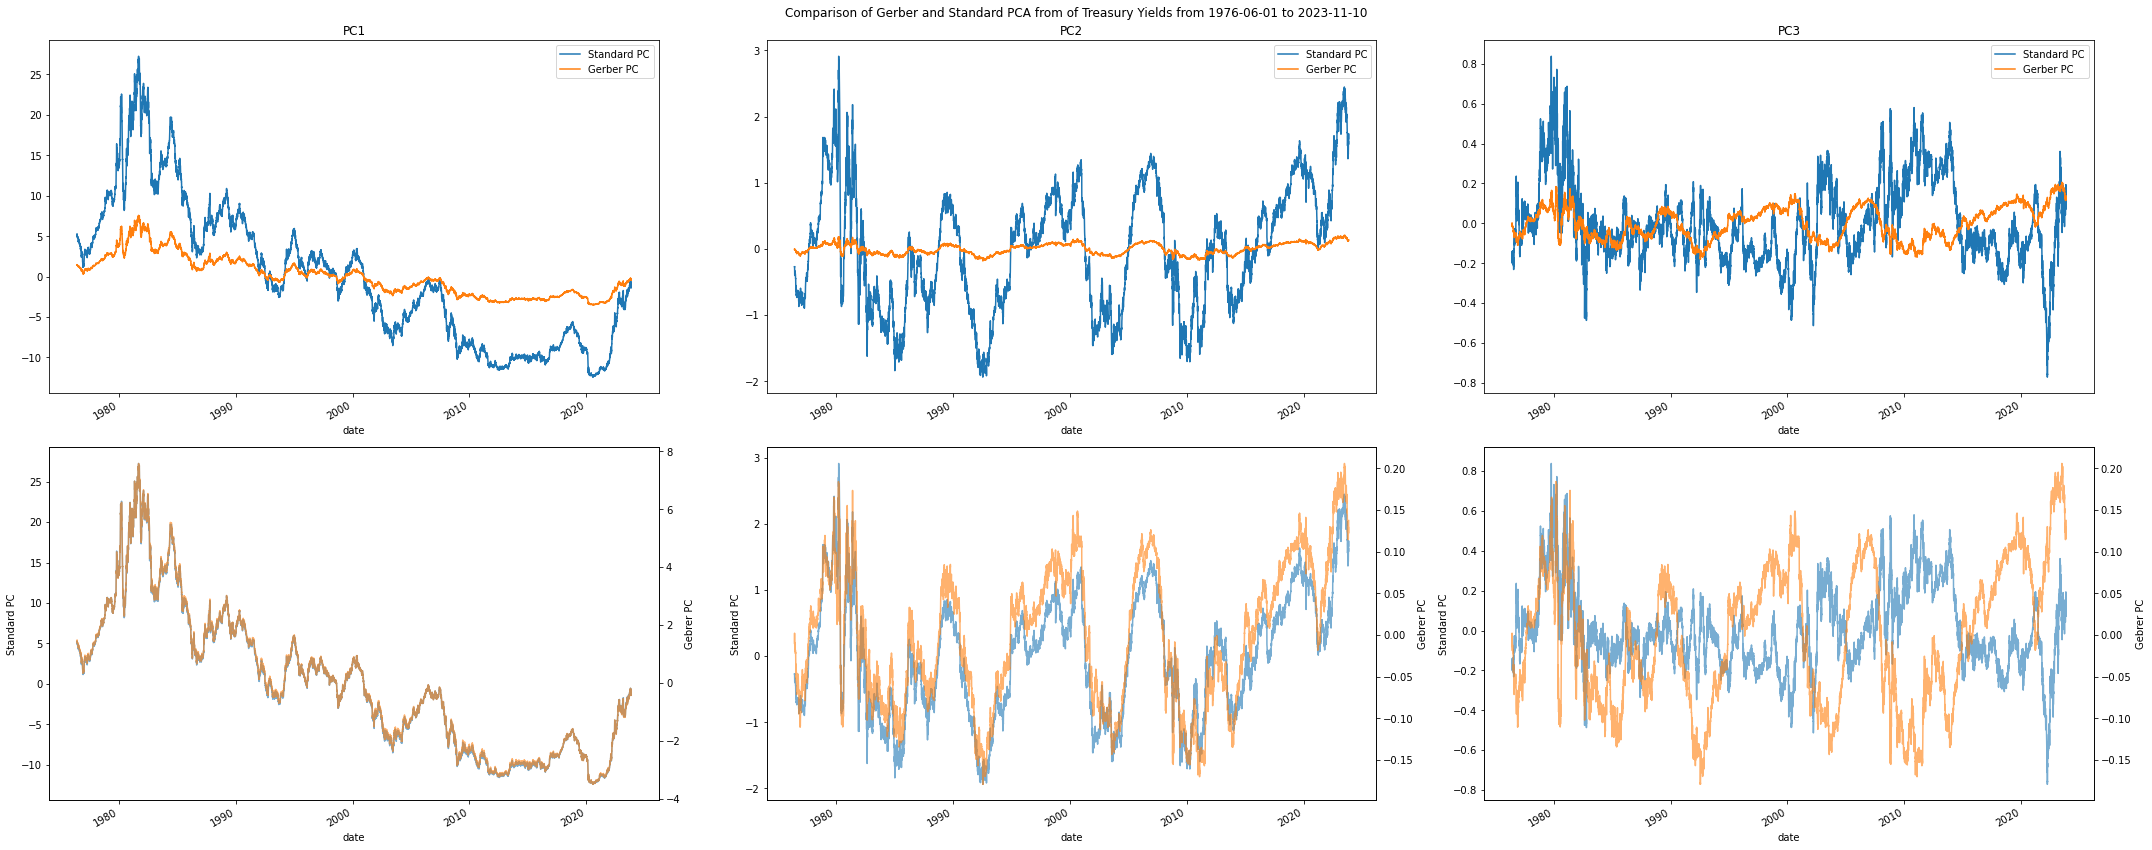

In [11]:
pcs = df_combined.variable.drop_duplicates().to_list()
fig, axes = plt.subplots(ncols = len(pcs), nrows = 2, figsize = (30,12))

for i, pc in enumerate(pcs):
    
    df_tmp = df_combined.query("variable == @pc").drop(columns = ["variable"])
              
    (df_tmp.plot(
        ax = axes[0,i],
        title = pc))
    
    (df_tmp[
        "Standard PC"].
        plot(
            ax = axes[1,i],
            alpha = 0.6,
            ylabel = "Standard PC"))
    
    axes_twinx = axes[1,i].twinx()
    (df_tmp[
        "Gerber PC"].
        plot(
            ax = axes_twinx,
            color = "tab:orange",
            alpha = 0.6,
            ylabel = "Gebrer PC"))
    
fig.suptitle("Comparison of Gerber and Standard PCA from of Treasury Yields from {} to {}".format(
    df_combined.index.min().date(),
    df_combined.index.max().date()))

plt.tight_layout()
plt.show()